Fetching live prices for 10 cycles (10 seconds)...
[19:52:03] BTC Price: $92585
[19:52:08] BTC Price: $92585
[19:52:12] BTC Price: $92585
[19:52:14] BTC Price: $92585
[19:52:15] BTC Price: $92585
[19:52:17] BTC Price: $92585
[19:52:22] BTC Price: $92585
[19:52:23] BTC Price: $92585
⚠ API Error: 429
Error retrieving price.
⚠ API Error: 429
Error retrieving price.

Final Data:
       Time  BTC_Price_USD
0  19:52:03          92585
1  19:52:08          92585
2  19:52:12          92585
3  19:52:14          92585
4  19:52:15          92585

--- BASIC ANALYSIS ---
Highest Price: 92585
Lowest Price: 92585
Average Price: 92585.0


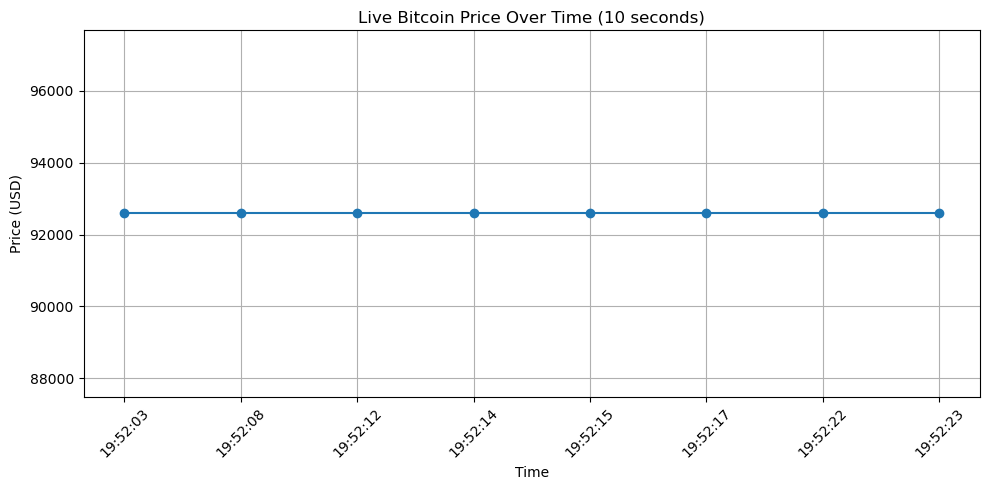

In [3]:
# ================================================================
# PROJECT 5 – FIXED: LIVE API DATA + ANALYSIS (COINGECKO VERSION)
# ================================================================

import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

# -------------------- STEP 1: GET LIVE API DATA --------------------

def get_live_price():
    """Fetch live Bitcoin USD price from CoinGecko API"""
    url = "https://api.coingecko.com/api/v3/simple/price"
    params = {
        "ids": "bitcoin",
        "vs_currencies": "usd"
    }

    response = requests.get(url, params=params)

    # Handle network issues safely
    if response.status_code != 200:
        print("⚠ API Error:", response.status_code)
        return None

    data = response.json()
    return data["bitcoin"]["usd"]

# -------------------- STEP 2: STREAM DATA --------------------

prices = []
timestamps = []

print("Fetching live prices for 10 cycles (10 seconds)...")

for i in range(10):
    price = get_live_price()
    
    if price:
        now = datetime.now().strftime("%H:%M:%S")
        prices.append(price)
        timestamps.append(now)
        print(f"[{now}] BTC Price: ${price}")
    else:
        print("Error retrieving price.")
    
    time.sleep(1)  # 1 second interval

# -------------------- STEP 3: CONVERT TO DATAFRAME --------------------

df = pd.DataFrame({
    "Time": timestamps,
    "BTC_Price_USD": prices
})

print("\nFinal Data:")
print(df.head())

# -------------------- STEP 4: PRICE ANALYSIS --------------------

print("\n--- BASIC ANALYSIS ---")
print("Highest Price:", df["BTC_Price_USD"].max())
print("Lowest Price:", df["BTC_Price_USD"].min())
print("Average Price:", df["BTC_Price_USD"].mean())

# -------------------- STEP 5: VISUALIZE LIVE TREND --------------------

plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["BTC_Price_USD"], marker='o')
plt.title("Live Bitcoin Price Over Time (10 seconds)")
plt.xlabel("Time")
plt.xticks(rotation=45)
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()
